In [7]:
import os
import time
import SP
import mat_properties as prop
import numpy as n
import pandas as pd
import Turboustanovka
from scipy.optimize import root

RP = prop.init_REFPROP(r"C:\Program Files (x86)\REFPROP")

water = prop.Materials_prop(
    "water",
    [1.0, 0, 0, 0, 0],
    prop.REFPROP_h_s,
    prop.REFPROP_p_t,
    prop.REFPROP_p_h,
    prop.REFPROP_p_s,
    prop.REFPROP_p_q,
    prop.REFPROP_t_q,
    prop.REFPROP_p_rho,
    prop.REFPROP_s_q,
    RP=RP,
)

# таблица номинального режима
gas_streams0 = pd.read_excel("streams0.xlsx", sheet_name="gas", index_col=0)
water_streams0 = pd.read_excel(
    "streams0.xlsx", sheet_name="water", index_col=0)
# таблица задаваемых значений (заменится на интерфейс)
gas_streams = pd.read_excel("streams.xlsx", sheet_name="gas", index_col=0)
water_streams = pd.read_excel("streams.xlsx", sheet_name="water", index_col=0)
heaters = pd.read_excel("blocks.xlsx", sheet_name="heaters", index_col=0)
electric = pd.read_excel("blocks.xlsx", sheet_name="electric", index_col=0)

start_time = time.time()

############################################################
#Теплосеть

Tnv = -3.1
water_streams.at["SWIN-TURB", "T"] = SP.Tset(Tnv)[1]
water_streams.at["SP2-WOUT", "T"] = SP.Tset(Tnv)[0]
# print(water_streams)

calctolerance = 10**-4

TU = Turboustanovka.turboustanovka(
    water, water_streams0, water_streams, heaters, electric, KPD_SP=0.99, KPDnasos=0.8)
TU_res = TU.calculate(
    teplofikacia=0, calcmethod="hybr", calctolerance=10**-3, maxiterations=20
)
# расход поменять в конденсаторе
print("fin:--- %s сек. ---" % round((time.time() - start_time), 1))
TU_res

Fin турбоустановка:--- 0.12 сек. ---
fin:--- 0.1 сек. ---


{'Turb_res': {'Efficiencies': [0.8493750337454516,
   0.8372292670775815,
   0.8149621114430419,
   0.8558718796341891],
  'Power': {'Ni': 76.22432433874526,
   'Ni1': 36.460325531045505,
   'Ni2': 9.655788696483775,
   'Ni3': 24.46210571075972,
   'Ni4': 5.646104400456269}},
 'KN': {'T2': 51.1017585275481,
  'P2': 0.6964,
  'h2real': 214.53711681037305,
  'G1': 78.16,
  'Ni': 0.06760177138646807,
  'Ngm': 0.06943401298605521,
  'KPD': 0.8,
  'KPDm': 0.9736117571087946}}

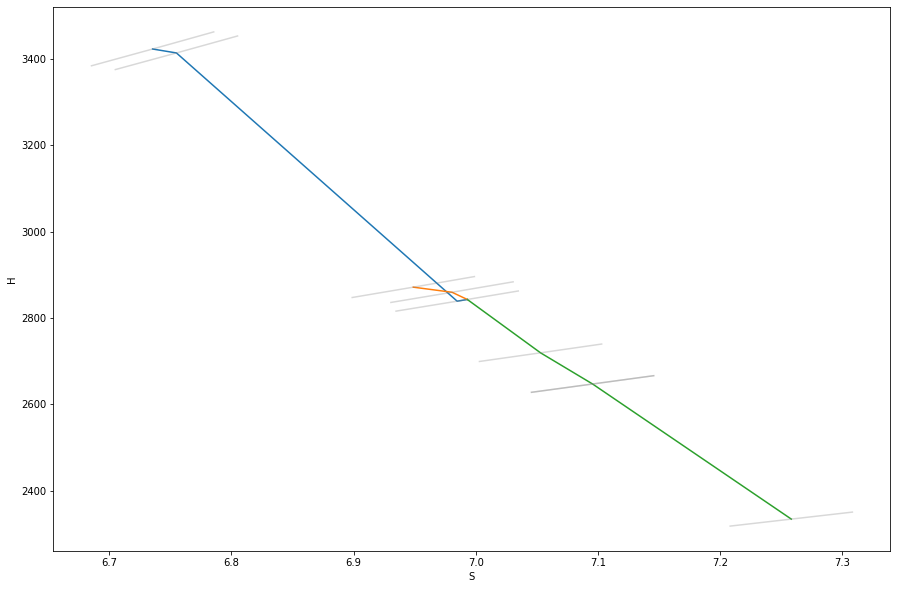

,T,P,H,G,S,X
AIR,15.000000,NaN,NaN,NaN,NaN,NaN
PEVD-DROSVD,511.500000,8.407000,3423.209978,63.400000,6.735584,NaN
IVD-PEVD,301.297556,8.746000,2747.104023,63.400000,NaN,NaN
EVD-IVD,298.800000,8.746000,1337.948265,63.400000,NaN,NaN
PEN-EVD,166.500000,8.746000,708.319849,63.400000,NaN,NaN
BND-PEN,164.738361,0.696400,696.095567,63.400000,NaN,NaN
PPND-DROSND,211.600000,0.691000,2871.481837,14.760000,6.948885,NaN
IND-PPND,164.738361,0.696400,2762.534980,14.760000,NaN,NaN
GPK-IND,164.600000,0.696400,695.493701,78.160000,NaN,NaN
GPK-REC,164.600000,0.696400,695.493701,82.910000,NaN,NaN


In [8]:
import Grafiki

Grafiki.H_S_diagram(water, water_streams, 15, 10)
water_streams

In [3]:
electric

,Ni,N,KPDm,KPD
PEN,NaN,NaN,NaN,NaN
CVD,NaN,NaN,NaN,NaN
CND,NaN,NaN,NaN,NaN
GTU,NaN,NaN,NaN,NaN
DK,NaN,NaN,NaN,NaN
Turbine,76.224324,NaN,NaN,NaN
Tots1,36.460326,NaN,NaN,0.849375
Tots2,9.655789,NaN,NaN,0.837229
Tots3,24.462106,NaN,NaN,0.814962
Tots4,5.646104,NaN,NaN,0.855872


In [4]:
water_streams

,T,P,H,G,S,X
AIR,15.000000,NaN,NaN,NaN,NaN,NaN
PEVD-DROSVD,511.500000,8.407000,3423.209978,63.400000,6.735584,NaN
IVD-PEVD,301.297556,8.746000,2747.104023,63.400000,NaN,NaN
EVD-IVD,298.800000,8.746000,1337.948265,63.400000,NaN,NaN
PEN-EVD,166.500000,8.746000,708.319849,63.400000,NaN,NaN
BND-PEN,164.738361,0.696400,696.095567,63.400000,NaN,NaN
PPND-DROSND,211.600000,0.691000,2871.481837,14.760000,6.948885,NaN
IND-PPND,164.738361,0.696400,2762.534980,14.760000,NaN,NaN
GPK-IND,164.600000,0.696400,695.493701,78.160000,NaN,NaN
GPK-REC,164.600000,0.696400,695.493701,82.910000,NaN,NaN


In [5]:
water_streams0

,T,P,H,G,S
PEVD-DROSVD,511.500000,8.407000,3423.209978,63.400000,NaN
IVD-PEVD,301.297556,8.746000,2747.104023,63.400000,NaN
EVD-IVD,298.800000,8.746000,1337.948265,63.400000,NaN
PEN-EVD,166.500000,8.746000,708.319849,63.400000,NaN
BND-PEN,164.738361,0.696400,696.095567,63.400000,NaN
PPND-DROSND,211.600000,0.691000,2871.481837,14.760000,NaN
IND-PPND,164.738361,0.696400,2762.534980,14.760000,NaN
GPK-IND,164.600000,0.696400,695.493701,78.160000,NaN
GPK-REC,164.600000,0.696400,695.493701,82.910000,NaN
REC-GPK,60.000000,0.696400,251.748396,82.910000,NaN


In [6]:
import os
import time

import mat_properties as prop
import numpy as n
import pandas as pd
import SP
import Turbine
from scipy.optimize import root

RP = prop.init_REFPROP(r"C:\Program Files (x86)\REFPROP")

water = prop.Materials_prop(
    "water",
    [1.0, 0, 0, 0, 0],
    prop.REFPROP_h_s,
    prop.REFPROP_p_t,
    prop.REFPROP_p_h,
    prop.REFPROP_p_s,
    prop.REFPROP_p_q,
    prop.REFPROP_t_q,
    prop.REFPROP_p_rho,
    RP=RP,
)

# таблица номинального режима
gas_streams0 = pd.read_excel("streams0.xlsx", sheet_name="gas", index_col=0)
water_streams0 = pd.read_excel(
    "streams0.xlsx", sheet_name="water", index_col=0)
# таблица задаваемых значений (заменится на интерфейс)
gas_streams = pd.read_excel("streams.xlsx", sheet_name="gas", index_col=0)
water_streams = pd.read_excel("streams.xlsx", sheet_name="water", index_col=0)
heaters = pd.read_excel("blocks.xlsx", sheet_name="heaters", index_col=0)
electric = pd.read_excel("blocks.xlsx", sheet_name="electric", index_col=0)


start_time = time.time()


class turboustanovka:
    def __init__(self, water, water_streams0, water_streams, heaters, electric, KPD_SP=0.99):
        self.Tepl_systema = SP.teplofik_systema(
            KPD_SP, water, water_streams0, water_streams
        )

        self.Turb = Turbine.turbine(
            water,
            "DROSVD-TURBVD",
            "ENDOFVD",
            "DROSND-TURBND",
            "SMESHEND",
            "DOOTB2",
            "DOOTB1",
            "INCND",
            "INKOND",
            water_streams0,
            water_streams,
        )
        self.water_streams = water_streams
        self.KPD_SP = KPD_SP
        self.heaters = heaters
        self.electric = electric

    def Find_Potb2(self, Diafragma):
        Diafragma_it = [0]
        G_sp2_it = 1
        G_sp1_it = 1
        P_turb_it = 1
        P_tepl_it = 1
        for i in range(self.maxiterations):
            Tepl_systema_res = self.Tepl_systema.calculate(
                self.maxiterations, calctolerance
            )
            G_sp2 = Tepl_systema_res["SP2"]["Gotb"]
            P_sp2 = Tepl_systema_res["SP2"]["p_otb"]
            G_sp1 = Tepl_systema_res["SP1"]["Gotb"]
            G_sp2 = max(0.01, G_sp2)
            G_sp1 = max(0.01, G_sp1)
            G_ots3 = max(
                0.01, self.water_streams.at["DOOTB2", "G"] - G_sp2)
            self.water_streams.at["DOOTB1", "G"] = G_ots3
            G_CND = max(
                0.001, self.water_streams.at["DOOTB1", "G"] - G_sp1)
            self.water_streams.loc["INCND":"INKOND", "G"] = G_CND
            self.water_streams.loc["OTB1-SP1", "T":"H"] = self.water_streams.loc[
                "DOOTB1", "T":"H"
            ]
            self.water_streams.at["OTB2-SP2", "T"] = self.water_streams.at[
                "DOOTB2", "T"
            ]
            self.water_streams.at["OTB2-SP2", "H"] = self.water_streams.at[
                "DOOTB2", "H"
            ]
            Turb_res = self.Turb.calculate(
                Diafragma, self.maxiterations, calctolerance)
            Potb2_turb = self.water_streams.at["DOOTB2", "P"]
            Potb2_teplof = self.water_streams.at["OTB2-SP2", "P"]

            Error_Gsp2 = (G_sp2_it-G_sp2)/G_sp2_it*100
            Error_Gsp1 = (G_sp1_it-G_sp1)/G_sp1_it*100
            Error_P_turb = (P_turb_it-Potb2_turb)/P_turb_it*100
            Error_P_tepl = (P_tepl_it-Potb2_teplof)/P_tepl_it*100
            G_sp2_it = G_sp2
            G_sp1_it = G_sp1
            P_turb_it = Potb2_turb
            P_tepl_it = Potb2_teplof

            Max_error = max(Error_Gsp2, Error_Gsp1, Error_P_turb, Error_P_tepl)
            # print("Potb2_turb", Potb2_turb)
            # print("Diafragma", Diafragma)
            if abs(Max_error) < calctolerance:
                print("G_sp2", G_sp2, "G_sp1", G_sp1, "P_sp2", P_sp2)
                print(
                    "Выход из цикла сведения турбины и теплофикации",
                    Max_error,
                )
                break

        Error_p = (Potb2_turb - Potb2_teplof) / Potb2_teplof * 100
        Diafragma_it.append(Diafragma)
        print("Error_p", Error_p)
        print("Diafragma", Diafragma)
        return Error_p

    def Find_Potb2_it(self, maxiterations):
        Diafragma = 0.05
        Diafragma_it = [0]
        for i in range(maxiterations):
            G_sp2_it = 1
            G_sp1_it = 1
            P_turb_it = 1
            P_tepl_it = 1
            for i in range(maxiterations):
                Tepl_systema_res = self.Tepl_systema.calculate(
                    maxiterations, calctolerance
                )
                G_sp2 = Tepl_systema_res["SP2"]["Gotb"]
                P_sp2 = Tepl_systema_res["SP2"]["p_otb"]
                G_sp1 = Tepl_systema_res["SP1"]["Gotb"]
                # print("G_sp2", G_sp2, "G_sp1", G_sp1, "P_sp2", P_sp2)
                G_sp2 = max(0.01, G_sp2)
                G_sp1 = max(0.01, G_sp1)
                G_ots3 = max(
                    0.001, self.water_streams.at["DOOTB2", "G"] - G_sp2)
                self.water_streams.at["DOOTB1", "G"] = G_ots3
                G_CND = max(
                    0.001, self.water_streams.at["DOOTB1", "G"] - G_sp1)
                self.water_streams.loc["INCND":"INKOND", "G"] = G_CND
                self.water_streams.loc["OTB1-SP1", "T":"H"] = self.water_streams.loc[
                    "DOOTB1", "T":"H"
                ]
                self.water_streams.at["OTB2-SP2", "T"] = self.water_streams.at[
                    "DOOTB2", "T"
                ]
                self.water_streams.at["OTB2-SP2", "H"] = self.water_streams.at[
                    "DOOTB2", "H"
                ]
                Turb_res = self.Turb.calculate(
                    Diafragma, maxiterations, calctolerance)
                Potb2_turb = self.water_streams.at["DOOTB2", "P"]
                Potb2_teplof = self.water_streams.at["OTB2-SP2", "P"]

                Error_Gsp2 = (G_sp2_it-G_sp2)/G_sp2_it*100
                Error_Gsp1 = (G_sp1_it-G_sp1)/G_sp1_it*100
                Error_P_turb = (P_turb_it-Potb2_turb)/P_turb_it*100
                Error_P_tepl = (P_tepl_it-Potb2_teplof)/P_tepl_it*100
                G_sp2_it = G_sp2
                G_sp1_it = G_sp1
                P_turb_it = Potb2_turb
                P_tepl_it = Potb2_teplof

                Max_error = max(Error_Gsp2, Error_Gsp1,
                                Error_P_turb, Error_P_tepl)
                # print("Potb2_turb", Potb2_turb)

                if abs(Max_error) < calctolerance:
                    # print(
                    #     "Выход из цикла сведения турбины и теплофикации",
                    #     Max_error,
                    # )
                    break

            Error_p = (Potb2_turb - Potb2_teplof) / Potb2_teplof * 100
            Diafragma = max(0, Diafragma - Error_p / 2500)
            Diafragma_it.append(Diafragma)
            # print("Diafragma", Diafragma)
            # print("Potb2_turb", Potb2_turb)
            if abs(Error_p) < calctolerance:
                print(
                    "Максимальная погрешность определения давления в верхнем отборе",
                    Error_p,
                )
                break
            if i == maxiterations - 1:
                print(
                    "Достигнуто максимальное количество итераций давления верхнего отбора"
                )
        print(Error_p)
        print(Diafragma_it)
        return Diafragma

    def calculate_t_rejim(self, calcmethod, calctolerance, maxiterations):

        Diafragma = self.Find_Potb2_it(50)
        # self.maxiterations=maxiterations
        # Solution_Potb2 = root(self.Find_Potb2, 0.08,
        #                                       method=calcmethod, tol=calctolerance)
        # Diafragma = float(Solution_Potb2.x)

        Turb_res = self.Turb.calculate(Diafragma, maxiterations, calctolerance)
        Tepl_systema_res = self.Tepl_systema.calculate(
            maxiterations, calctolerance)

        Result = {
            "Turb_res": self.Turb.calculate_power(),
            "Tepl_systema_res": Tepl_systema_res,
            "Diafragma": Diafragma,
        }
        return Result

    def calculate(
        self,
        teplofikacia=0,
        calcmethod="hybr",
        calctolerance=10**-3,
        maxiterations=20,
    ):

        if teplofikacia == 1:
            Result = self.calculate_t_rejim(
                calcmethod, calctolerance, maxiterations)

        if teplofikacia == 0:
            diafragma = 0
            Turb_res = self.Turb.calculate(
                diafragma, maxiterations, calctolerance)
            Result = {"Turb_res": Turb.calculate_power()}

        # запись данных в таблицу блоков
        Qsp1 = Result['Tepl_systema_res']['SP1']['Qw']
        Qsp2 = Result['Tepl_systema_res']['SP2']['Qw']
        Qod = Result['Tepl_systema_res']['OD']['Qw']
        Ni = Result['Turb_res']['Ni']
        Ni1 = Result['Turb_res']['Ni1']
        Ni2 = Result['Turb_res']['Ni2']
        Ni3 = Result['Turb_res']['Ni3']
        Ni4 = Result['Turb_res']['Ni4']

        self.heaters.at["SP2", "Qw"] = Qsp2
        self.heaters.at["SP1", "Qw"] = Qsp1
        self.heaters.at["OD", "Qw"] = Qod
        self.heaters.at["SP2", "KPD"] = self.KPD_SP
        self.heaters.at["SP1", "KPD"] = self.KPD_SP
        self.heaters.at["OD", "KPD"] = self.KPD_SP
        self.electric.at["Turbine", "Ni"] = Ni
        self.electric.loc["Tots1":"Tots4", "Ni"] = [Ni1, Ni2, Ni3, Ni4]

        return Result


KPD_SP = 0.99
calctolerance = 10**-3

start_time = time.time()
TU = turboustanovka(water, water_streams0, water_streams,
                    heaters, electric, KPD_SP)
TU_res = TU.calculate(
    teplofikacia=1, calcmethod="hybr", calctolerance=10**-3, maxiterations=50
)

print("fin:--- %s сек. ---" % round((time.time() - start_time), 1))
TU_res

TypeError: Materials_prop.__init__() missing 1 required positional argument: 'sq_func'

In [ ]:
water_streams

In [ ]:
# тепловой баланс всей теплофикационной установки
Qvd = water_streams.at["DROSVD-TURBVD", "G"] * \
    water_streams.at["DROSVD-TURBVD", "H"]/1000
Qnd = water_streams.at["DROSND-TURBND", "G"] * \
    water_streams.at["DROSND-TURBND", "H"]/1000
Qcond = water_streams.at["INKOND", "G"]*water_streams.at["INKOND", "H"]/1000
Qgpk = water_streams.at["OD-GPK", "G"]*water_streams.at["OD-GPK", "H"]/1000
Qsp = water_streams.at["OTB2-SP2", "G"]*water_streams.at["OTB2-SP2", "H"] / \
    1000+water_streams.at["OTB1-SP1", "G"] * \
    water_streams.at["OTB1-SP1", "H"]/1000
Qvd+Qnd-Qgpk-Qcond

In [ ]:
Qsp1 = TU_res['Tepl_systema_res']['SP1']['Qw']
Qsp2 = TU_res['Tepl_systema_res']['SP2']['Qw']
Qod = TU_res['Tepl_systema_res']['OD']['Qw']
Ni = TU_res['Turb_res']['Ni']
(Qsp1+Qsp2+Qod)/0.99+Ni

In [ ]:
water_streams

In [ ]:
electric

In [ ]:
heaters